In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

COST FUNCTION AND GRADIENT DESCENT FOR LINEAR REGRESSION

In [24]:
dataset = pd.read_csv('Salary_dataset.csv')

In [25]:
dataset = dataset.drop('S.No', axis=1)

X = dataset[['YearsExperience']].values
y = dataset[['Salary']].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lin_reg.predict(X_test)

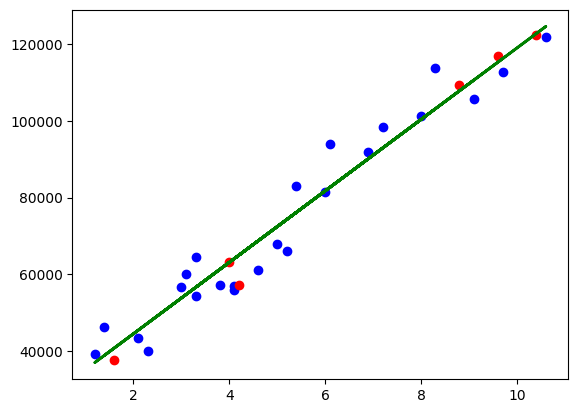

In [29]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, lin_reg.predict(X_train), color='green', linewidth=2, label='Regression Line')

<ipython-input-30-62609fbcd409>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


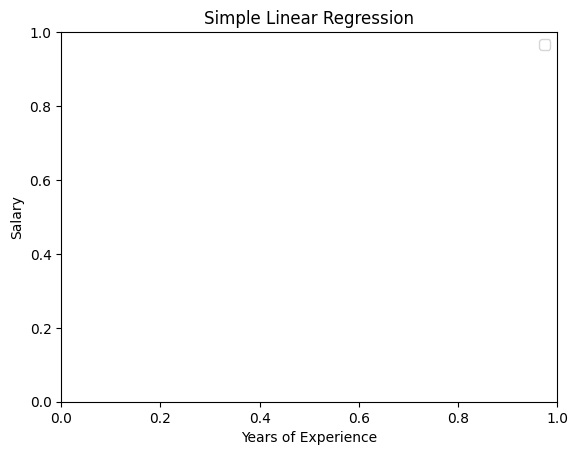

In [30]:
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [31]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [32]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history

In [33]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [34]:
theta = np.zeros((X_train_bias.shape[1], 1))
alpha = 0.01
iterations = 1000
theta_optimal, cost_history = gradient_descent(X_train_bias, y_train, theta, alpha, iterations)


Iteration 0: Cost = 1361716222.8637688
Iteration 100: Cost = 56360306.17019967
Iteration 200: Cost = 43948098.58097185
Iteration 300: Cost = 35559947.44885114
Iteration 400: Cost = 29891247.589499507
Iteration 500: Cost = 26060348.79079266
Iteration 600: Cost = 23471433.171680618
Iteration 700: Cost = 21721847.908518676
Iteration 800: Cost = 20539480.83155566
Iteration 900: Cost = 19740438.947675385


In [35]:
y_pred_gd = X_test_bias.dot(theta_optimal)


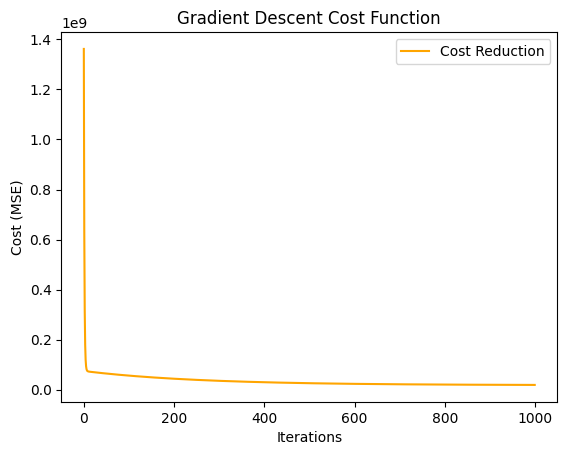

In [36]:
plt.plot(range(iterations), cost_history, color='orange', label="Cost Reduction")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Function")
plt.legend()
plt.show()

COST FUNCTION AND GRADIENT DESCENT FOR MULTI REGRESSION

In [37]:
dataset = pd.read_csv('cars.csv')
dataset = dataset.drop('car_names', axis=1)

In [38]:
X = dataset.drop('miles_per_gallon', axis=1).values
y = dataset['miles_per_gallon'].values.reshape(-1, 1)

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [42]:
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 1000

In [43]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [44]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history

In [45]:
theta_optimal, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

Iteration 0: Cost = 234.16441579658803
Iteration 100: Cost = 29.186238383114638
Iteration 200: Cost = 6.0616336524709835
Iteration 300: Cost = 2.780195566608087
Iteration 400: Cost = 2.2246067834967853
Iteration 500: Cost = 2.0587215515964115
Iteration 600: Cost = 1.9604156420738137
Iteration 700: Cost = 1.8828364505383113
Iteration 800: Cost = 1.8173400916606566
Iteration 900: Cost = 1.7610103420958338


In [46]:
y_pred = X_test.dot(theta_optimal)

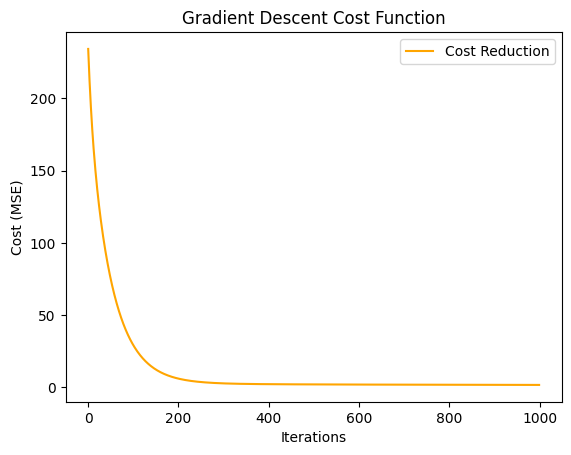

In [47]:
plt.plot(range(iterations), cost_history,  color='orange', label="Cost Reduction")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Function")
plt.legend()
plt.show()

In [48]:
print("Optimized Theta (Weights):", theta_optimal.flatten())

Optimized Theta (Weights): [20.3043124   0.11041148  0.20906514 -0.59265996  0.47376342 -2.8835453
  0.56040228  0.45990508  1.06908272  0.92251339 -1.51068721]
